In [33]:
import pandas as pd

In [34]:
df = pd.read_csv('heart.csv')

In [35]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [36]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [37]:
df.shape

(1025, 14)

In [38]:
x = df.drop('target',axis=1)
y = df['target']

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y ,test_size=0.25, random_state=42)


In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [41]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc = DecisionTreeClassifier()

In [42]:
dtc.fit(x_train_sc,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [43]:
pred = dtc.predict(x_test_sc)

In [44]:
dtc.score(x_test_sc, y_test)

0.9766536964980544

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       132
           1       1.00      0.95      0.98       125

    accuracy                           0.98       257
   macro avg       0.98      0.98      0.98       257
weighted avg       0.98      0.98      0.98       257



In [47]:
import matplotlib.pyplot as plt

In [48]:
label = y.map({0:'yes',1 : 'no'}).unique()

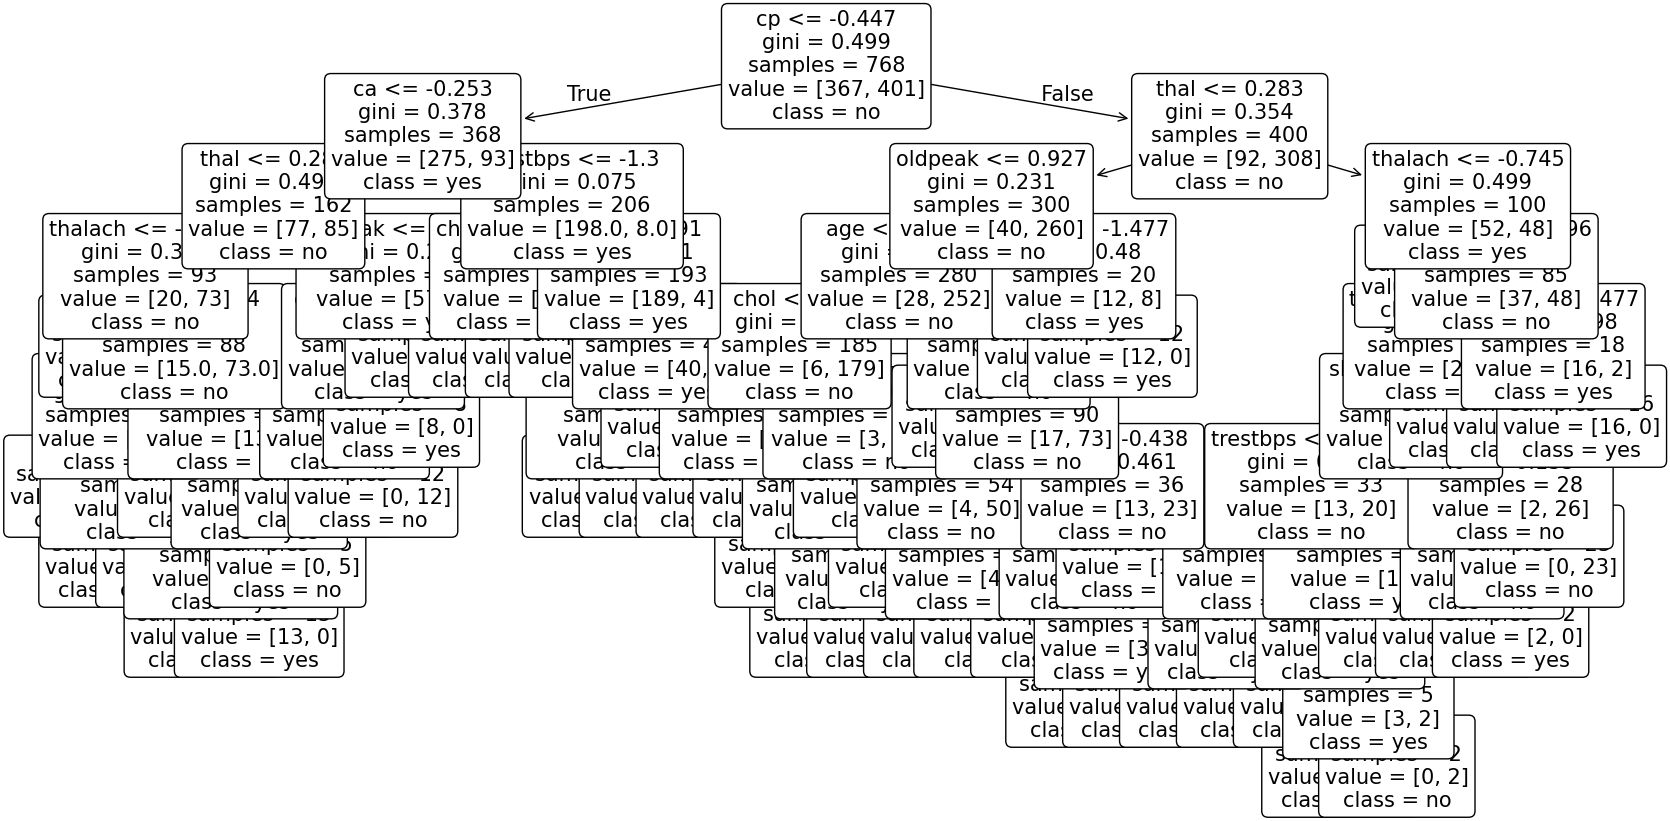

In [49]:
plt.figure(figsize=(20,10))
plot_tree(dtc,feature_names=list(x.columns),class_names= list(label),rounded= True,fontsize=15)
plt.show()

In [50]:
df = pd.read_csv('Housing.csv')

In [51]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
mainroad            0
guestroom           0
basement            0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [52]:
df.duplicated().sum()

np.int64(0)

In [64]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
mainroad            object
guestroom           object
basement            object
airconditioning     object
parking              int64
furnishingstatus    object
dtype: object

In [54]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [57]:
catcol = df.select_dtypes(include='object').columns.to_list()

In [58]:
processor = ColumnTransformer(transformers=[
    ('div', OneHotEncoder(drop='first'),catcol)
],
remainder= 'passthrough'
)

In [63]:
divyansh = Pipeline(steps=[
    ('ohe', processor),
    ('model', DecisionTreeRegressor(ccp_alpha=10))
])

In [60]:
divyansh.fit(x_train, y_train)

,steps,"[('ohe', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('div', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [61]:
pred = divyansh.predict(x_test)

In [62]:
divyansh.score(x_test, y_test)

0.3535531863211382